In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances

# Load Titanic Dataset
df = pd.read_csv("Titanic Dataset.csv")

In [3]:
# Select Relevant Features
df = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex']]  # Choose numeric & categorical columns
df.dropna(inplace=True)  # Remove missing values

# Encode Categorical Variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Convert 'Sex' (Male=1, Female=0)

# Standardize Features for Better Clustering
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [4]:
# Apply K-Means Clustering
K = 3  # Number of clusters
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compute Intra-cluster Distance (Average distance within each cluster)
intra_cluster_distances = []
for i in range(K):
    cluster_points = X[df['Cluster'] == i]
    centroid = centroids[i]
    intra_cluster_distances.append(np.mean(np.linalg.norm(cluster_points - centroid, axis=1)))

avg_intra_distance = np.mean(intra_cluster_distances)

# Compute Inter-cluster Distance (Average distance between centroids)
inter_cluster_distance = np.mean(euclidean_distances(centroids))

Average Intra-Cluster Distance: 1.9483
Average Inter-Cluster Distance: 1.9450


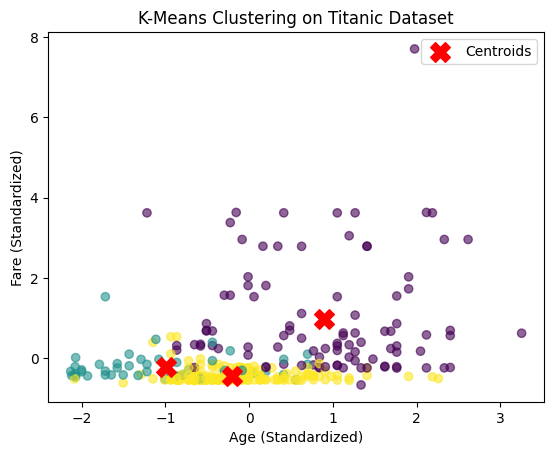

In [5]:
# Print Results
print(f"Average Intra-Cluster Distance: {avg_intra_distance:.4f}")
print(f"Average Inter-Cluster Distance: {inter_cluster_distance:.4f}")

# Visualize Clusters (Using First Two Features)
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on Titanic Dataset")
plt.xlabel("Age (Standardized)")
plt.ylabel("Fare (Standardized)")
plt.legend()
plt.show()